In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from pydataset import data
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

 - We should be at the point we are creating functions that can be used over and over again.
 - Something that we will constantly do is split our data into train, validate and test sets.
 - we will also be isolating our target variables into y_train, y_validate and y_test.
   


In [2]:
# create a function to split our data
def split_data(df):
    train_validate, test = train_test_split(df, test_size = 0.2, random_state=123)
    train, validate = train_test_split(train_validate, test_size=0.2, random_state=123)
    # Take a look at your split datasets

    print(f"""
    train -> {train.shape}
    validate -> {validate.shape}
    test -> {test.shape}""")
    
    return train, validate, test


In [3]:
#create a function to isolate the target variable
def X_y_split(df, target):
    train, validate, test = split_data(df)
    X_train = train.drop(columns= target)
    y_train = train[target]

    X_validate = validate.drop(columns= target)
    y_validate = validate[target]

    X_test = test.drop(columns= target)
    y_test = test[target]
        
    # Have function print datasets shape
    print(f'''
    X_train -> {X_train.shape}
    X_validate -> {X_validate.shape}
    X_test -> {X_test.shape}''') 
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test




By not hardcoding our dataframe and target, we can use these functions for other datasets and projects.


1. Load the tips dataset.

In [4]:
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [7]:
df = df.rename(columns = {'size':'number_of_people'})

In [8]:
def get_object_cols(df):
        object_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    

        return object_cols


def get_numeric_cols(df):
    
    # get a list of the column names that are objects (from the mask)
    num_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist()
    
    return num_cols

a. Create a column named price_per_person. This should be the total bill divided by the party size.

In [9]:
df['price_per_person'] = df['total_bill'] / df['number_of_people']


In [10]:
df.head()

,total_bill,tip,sex,smoker,day,time,number_of_people,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
2,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
3,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
4,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
5,24.59,3.61,Female,No,Sun,Dinner,4,6.147500


b. Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?

/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


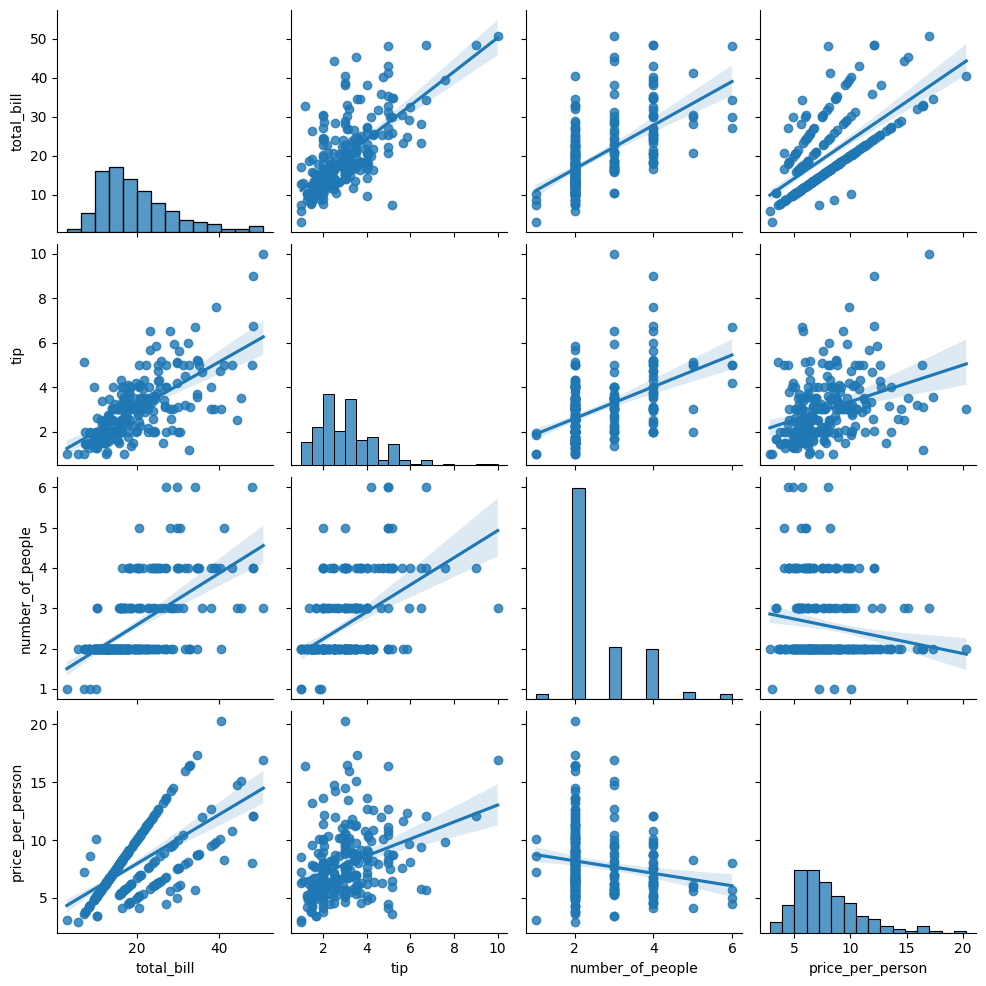

In [11]:
sns.pairplot(df, kind='reg')

Total_bill appear to have a stronger correlation



In [12]:
obj_cols = get_object_cols(df)
obj_cols

['sex', 'smoker', 'day', 'time']

In [13]:
df_dummy=pd.get_dummies(columns=obj_cols, data=df)
df_dummy = df_dummy.astype(int)
df_dummy.head()

,total_bill,tip,number_of_people,price_per_person,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
1,16,1,2,8,1,0,1,0,0,0,1,0,1,0
2,10,1,3,3,0,1,1,0,0,0,1,0,1,0
3,21,3,3,7,0,1,1,0,0,0,1,0,1,0
4,23,3,2,11,0,1,1,0,0,0,1,0,1,0
5,24,3,4,6,1,0,1,0,0,0,1,0,1,0


In [14]:
#drop a couple cols that are redundant

df_dummy.drop(columns = ['sex_Female', 'smoker_No', 'time_Dinner', 'day_Thur'], inplace=True)
df_dummy.head()

,total_bill,tip,number_of_people,price_per_person,sex_Male,smoker_Yes,day_Fri,day_Sat,day_Sun,time_Lunch
1,16,1,2,8,0,0,0,0,1,0
2,10,1,3,3,1,0,0,0,1,0
3,21,3,3,7,1,0,0,0,1,0
4,23,3,2,11,1,0,0,0,1,0
5,24,3,4,6,0,0,0,0,1,0


In [15]:
train, validate, test = split_data(df_dummy)


    train -> (156, 10)
    validate -> (39, 10)
    test -> (49, 10)


In [16]:
X_train, y_train, X_validate, y_validate, X_test, y_test = X_y_split(df_dummy, 'tip')



    train -> (156, 10)
    validate -> (39, 10)
    test -> (49, 10)

    X_train -> (156, 9)
    X_validate -> (39, 9)
    X_test -> (49, 9)


In [17]:
def scale_data(train, 
               validate, 
               test, 
               to_scale):
    #make copies for scaling
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()

    #scale them!
    #make the thing
    scaler = MinMaxScaler()

    #fit the thing
    scaler.fit(train[to_scale])

    #use the thing
    train_scaled[to_scale] = scaler.transform(train[to_scale])
    validate_scaled[to_scale] = scaler.transform(validate[to_scale])
    test_scaled[to_scale] = scaler.transform(test[to_scale])
    
    return train_scaled, validate_scaled, test_scaled


In [18]:
X_train.columns.tolist()


['total_bill',
 'number_of_people',
 'price_per_person',
 'sex_Male',
 'smoker_Yes',
 'day_Fri',
 'day_Sat',
 'day_Sun',
 'time_Lunch']

In [23]:
to_scale = X_train.columns.tolist()


In [24]:
X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(X_train, X_validate, X_test, to_scale)


In [25]:
X_train_scaled.columns


Index(['total_bill', 'number_of_people', 'price_per_person', 'sex_Male',
       'smoker_Yes', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch'],
      dtype='object')

In [26]:
print(f"""
X_train_scaled: {X_train_scaled.shape} 
X_validate_scaled: {X_validate_scaled.shape} 
X_test_scaled: {X_test_scaled.shape}
""")


X_train_scaled: (156, 9) 
X_validate_scaled: (39, 9) 
X_test_scaled: (49, 9)



In [27]:
X_train_scaled.head()

,total_bill,number_of_people,price_per_person,sex_Male,smoker_Yes,day_Fri,day_Sat,day_Sun,time_Lunch
126,0.577778,1.0,0.058824,0.0,0.0,0.0,0.0,0.0,1.0
189,0.333333,0.4,0.176471,0.0,1.0,0.0,0.0,1.0,0.0
84,0.644444,0.2,0.764706,1.0,1.0,0.0,0.0,0.0,1.0
241,0.533333,0.2,0.588235,0.0,1.0,0.0,1.0,0.0,0.0
40,0.622222,0.4,0.411765,1.0,0.0,0.0,1.0,0.0,0.0


c. Use Select K Best to select the top 2 features for predicting tip amount. What are they?

In [28]:
kbest = SelectKBest(f_regression, k=2)

#FIT the thing
kbest.fit(X_train_scaled, y_train)

SelectKBest(k=2, score_func=<function f_regression at 0x160841900>)

In [29]:
kbest_results = pd.DataFrame(dict(p_value=kbest.pvalues_, f_score=kbest.scores_), 
                index=X_train_scaled.columns)

In [30]:
kbest_results.sort_values(by=['f_score'], ascending=False)


,p_value,f_score
total_bill,9.767301e-22,125.964121
number_of_people,1.598941e-12,59.183625
price_per_person,1.164104e-04,15.642277
day_Sun,1.478957e-01,2.115015
day_Fri,2.020460e-01,1.641498
time_Lunch,2.052982e-01,1.617929
sex_Male,5.382781e-01,0.380441
smoker_Yes,7.744982e-01,0.082369
day_Sat,9.649590e-01,0.001936


In [31]:
kbest_results.sort_values(by=['f_score'], ascending=False).head(2)


,p_value,f_score
total_bill,9.767301e-22,125.964121
number_of_people,1.598941e-12,59.183625


In [32]:
feature_mask = kbest.get_support()

#now we are going to ask for the column names of select k best top 2 features
X_train_scaled.columns[feature_mask]

Index(['total_bill', 'number_of_people'], dtype='object')

d.Use Recursive Feature Elimination to select the top 2 features for tip amount. What are they?


In [33]:
#Choose learning estimator
model = LinearRegression()

# MAKE the thing
rfe = RFE(model, n_features_to_select=2)

# FIT the thing
rfe.fit(X_train_scaled, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=2)

In [34]:
rfe_ranking = pd.DataFrame({'rfe_ranking': rfe.ranking_},
                              index=X_train_scaled.columns)

In [35]:
rfe_ranking.sort_values(by=['rfe_ranking'], ascending=True)


,rfe_ranking
total_bill,1
price_per_person,1
day_Sat,2
sex_Male,3
time_Lunch,4
number_of_people,5
smoker_Yes,6
day_Sun,7
day_Fri,8


In [36]:
#create a variable that takes X_train and turns rfe features into a list
rfe_columns = X_train_scaled.columns[rfe.support_].tolist()

#call the variable
rfe_columns

['total_bill', 'price_per_person']

In [37]:
rfe.get_support()


array([ True, False,  True, False, False, False, False, False, False])

2.   Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [38]:
def select_kbest(X, y, k=2):
    '''
    will take in two pandas objects:
    X: a dataframe representing numerical independent features
    y: a pandas Series representing a target variable
    k: a keyword argument defaulted to 2 for the number of ideal features we elect to select
    
    return: a list of the selected features from the SelectKBest process
    '''
    kbest = SelectKBest(f_regression, k=k)
    kbest.fit(X, y)
    mask = kbest.get_support()
    return X.columns[mask]

In [39]:
select_kbest(X_train_scaled, y_train, 2)



Index(['total_bill', 'number_of_people'], dtype='object')

In [40]:
select_kbest(X_train_scaled, y_train,5)


Index(['total_bill', 'number_of_people', 'price_per_person', 'day_Fri',
       'day_Sun'],
      dtype='object')

3. Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top n features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.



In [41]:
def show_features_rankings(X_train, rfe):
    """
    Takes in a dataframe and a fit RFE object in order to output the rank of all features
    """
    # Dataframe of rankings
    ranks = pd.DataFrame({'rfe_ranking': rfe.ranking_}
                        ,index = X_train.columns)
    
    ranks = ranks.sort_values(by="rfe_ranking", ascending=True)
    
    return ranks

In [42]:
#now let's put together everything we learned above and make a function to do all of those steps together
def rfe(X, y, k=2):
    '''
    will take in two pandas objects:
    X: a dataframe representing numerical independent features
    y: a pandas Series representing a target variable
    k: a keyword argument defaulted to 2 for the number of ideal features we elect to select
    
    return: a list of the selected features from the recursive feature elimination process
        & a df of all rankings
    '''
    #MAKE the thing
    rfe = RFE(LinearRegression(), n_features_to_select=k)
    #FIT the thing
    rfe.fit(X, y)
        
    # use the thing
    features_to_use = X.columns[rfe.support_].tolist()
    
    # we need to send show_feature_rankings a trained/fit RFE object
    all_rankings = show_features_rankings(X, rfe)
    
    return features_to_use, all_rankings

In [43]:
#let's call our function using x and y train with the 2 top features
selected_features, all_rankings = rfe(X_train_scaled, y_train, 2)

print(selected_features)
all_rankings

['total_bill', 'price_per_person']


,rfe_ranking
total_bill,1
price_per_person,1
day_Sat,2
sex_Male,3
time_Lunch,4
number_of_people,5
smoker_Yes,6
day_Sun,7
day_Fri,8


In [44]:
#let's call our function using x and y train with the 2 top features
selected_features, all_rankings = rfe(X_train_scaled, y_train, 5)

print(selected_features)
all_rankings

['total_bill', 'price_per_person', 'sex_Male', 'day_Sat', 'time_Lunch']


,rfe_ranking
total_bill,1
price_per_person,1
sex_Male,1
day_Sat,1
time_Lunch,1
number_of_people,2
smoker_Yes,3
day_Sun,4
day_Fri,5


In [45]:
X_train_scaled.head()


,total_bill,number_of_people,price_per_person,sex_Male,smoker_Yes,day_Fri,day_Sat,day_Sun,time_Lunch
126,0.577778,1.0,0.058824,0.0,0.0,0.0,0.0,0.0,1.0
189,0.333333,0.4,0.176471,0.0,1.0,0.0,0.0,1.0,0.0
84,0.644444,0.2,0.764706,1.0,1.0,0.0,0.0,0.0,1.0
241,0.533333,0.2,0.588235,0.0,1.0,0.0,1.0,0.0,0.0
40,0.622222,0.4,0.411765,1.0,0.0,0.0,1.0,0.0,0.0


4. Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using both Select K Best and Recursive Feature Elimination (use the functions you just built to help you out).



In [46]:
swiss= data('swiss')

In [47]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [49]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [50]:
# X and y splits
target = "Fertility"

# Split the data
train, validate, test = split_data(swiss)

# Setup X and y
X_train = train.drop(columns=[target])
y_train = train[target]

X_validate = validate.drop(columns=[target])
y_validate = validate[target]

X_test = test.drop(columns=[target])
y_test = test[target]


    train -> (29, 6)
    validate -> (8, 6)
    test -> (10, 6)


In [51]:
to_scale = X_train.columns.tolist()


In [52]:
X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(X_train, X_validate, X_test, to_scale)


In [53]:
print(f"""
X_train_scaled: {X_train_scaled.shape} 
X_validate_scaled: {X_validate_scaled.shape} 
X_test_scaled: {X_test_scaled.shape}
""")


X_train_scaled: (29, 5) 
X_validate_scaled: (8, 5) 
X_test_scaled: (10, 5)



In [54]:
select_kbest(X_train_scaled, y_train, 3).tolist()


['Examination', 'Education', 'Infant.Mortality']

In [55]:
# Find the top 3 features using RFE
selected_features, all_rankings = rfe(X_train_scaled, y_train, 3)

print(selected_features)
all_rankings

['Examination', 'Education', 'Infant.Mortality']


,rfe_ranking
Examination,1
Education,1
Infant.Mortality,1
Agriculture,2
Catholic,3
